<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import pandas as pd
import sklearn.datasets

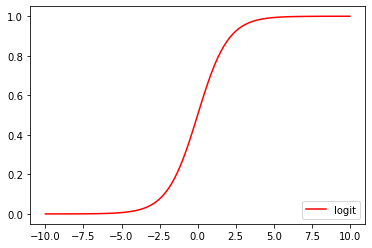

In [ ]:

x=np.linspace(-10,10,100)
y=1.0/(1.0+np.exp(-x))
plt.plot(x,y,'r-',label='logit')
plt.legend(loc='lower right')

In [ ]:
df=pd.read_excel('C:\DATASET\data.xlsx',sheet_name='grade_set_1_classification')
df

,Hours_Studied,Result
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1
5,7,1
6,8,1
7,9,1
8,10,1


[0 0 0 1 1 1 1 1 1]
[0.94631938 0.84686389 0.63434384 0.35242027 0.14582452 0.05083257
 0.01652264 0.00524262 0.00165055]


<ipython-input-9-738f094e182d>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x=df.Hours_Studied[:,np.newaxis]


Text(0, 0.5, 'result')

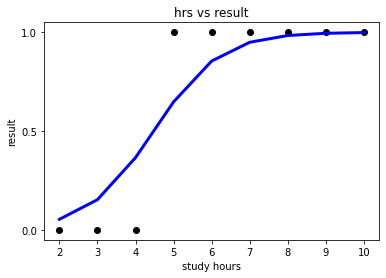

In [ ]:

x=df.Hours_Studied[:,np.newaxis]
y=df.Result
df['Intercept']=1
indep_vars=['Hours_Studied','Intercept']
x=df[indep_vars]
y=df['Result']
model=LogisticRegression()
model=model.fit(x,y)

#check accuracy of the model on training dataset
model.score(x,y)
print(model.predict(x))
print(model.predict_proba(x)[:,0])


plt.scatter(df.Hours_Studied,y,color='black')
plt.yticks([0.0,0.5,1.0])
plt.plot(df.Hours_Studied,model.predict_proba(x)[:,1],color='blue',linewidth=3)
plt.title('hrs vs result')
plt.xlabel('study hours')
plt.ylabel('result')

In [ ]:
#confusion matrix

print ('accuracy :',metrics.accuracy_score(y,model.predict(x)))
print ('AUC :',metrics.roc_auc_score(y,model.predict_proba(x)[:,1]))
print ('confusion matrix  :',metrics.confusion_matrix(y,model.predict(x)))
print ('classification report :',metrics.classification_report(y,model.predict(x)))

NameError: name 'model' is not defined

In [ ]:
fpr,tpr,_ =metrics.roc_curve(y,model.predict_proba(x)[:,1])
roc_auc=metrics.auc(fpr,tpr)
print ('roc auc : %0.2f' %roc_auc)
plt.figure()
plt.plot(fpr,tpr,label='roc curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim(0.0,1.0)
plt.ylim([0.0,1.05])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.legend(loc='lower right')
plt.show()

NameError: name 'y' is not defined

In [ ]:
#instantiate  a logistic regresion model with default c value and fit with x y
model=LogisticRegression()
model=model.fit(x,y)

#chk accuracy for train set
print('c=1, accuracy:',metrics.accuracy_score(y,model.predict(x)))

model1=LogisticRegression(C=10)
model1=model1.fit(x,y)

#chk accuracy for train set
print('c=10, accuracy:',metrics.accuracy_score(y,model1.predict(x)))


model2=LogisticRegression(C=100)
model2=model2.fit(x,y)

#chk accuracy for train set
print('c=100, accuracy:',metrics.accuracy_score(y,model2.predict(x)))


model3=LogisticRegression(C=1000)
model3=model3.fit(x,y)

#chk accuracy for train set
print('c=1000, accuracy:',metrics.accuracy_score(y,model3.predict(x)))

c=1, accuracy: 1.0
c=10, accuracy: 1.0
c=100, accuracy: 1.0
c=1000, accuracy: 1.0


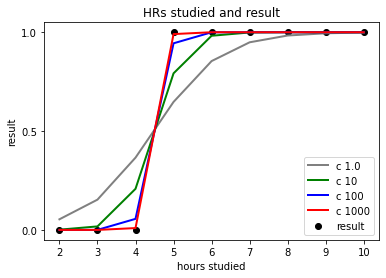

In [ ]:
#PLOTTING FITTED LINES
plt.scatter(df.Hours_Studied,y,color='black',label='result')
plt.yticks([0.0,0.5,1.0])
plt.plot(df.Hours_Studied,model.predict_proba(x)[:,1],color='gray',linewidth=2,label='c 1.0')
plt.plot(df.Hours_Studied,model1.predict_proba(x)[:,1],color='green',linewidth=2,label='c 10')
plt.plot(df.Hours_Studied,model2.predict_proba(x)[:,1],color='blue',linewidth=2,label='c 100')
plt.plot(df.Hours_Studied,model3.predict_proba(x)[:,1],color='red',linewidth=2,label='c 1000')
plt.legend(loc='lower right')
plt.title('HRs studied and result')
plt.ylabel('result')
plt.xlabel('hours studied')
plt.show()